<a href="https://colab.research.google.com/github/SebasLion/Simulacion_1_Sebas/blob/main/M_Composici%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método de composción
El método de composición es una técnica utilizada para generar variables aleatorias con una distribución específica combinando varias distribuciones más simples. Este método se basa en la idea de que una distribución compleja puede ser expresada como una combinación ponderada de distribuciones más simples.

Pasos del método de composición:

1. Definición de las distribuciones base:
Se eligen una o más distribuciones simples de las cuales se sabe cómo generar variables aleatorias. Estas distribuciones pueden ser uniformes, exponenciales, normales, entre otras.

2. Definición de las funciones de densidad de probabilidad (PDF):
Para cada distribución base seleccionada, se define su función de densidad de probabilidad (PDF).

3. Cálculo de las constantes de normalización:
Para cada distribución base, se calcula una constante de normalización tal que la función de densidad de probabilidad multiplicada por esta constante sea una distribución de probabilidad válida (es decir, integre a 1).

4. Combinación de las distribuciones:
Se selecciona aleatoriamente una de las distribuciones base para generar una variable aleatoria según esta distribución. La selección de la distribución base se realiza utilizando una regla de decisión que generalmente involucra una variable aleatoria uniforme.

5. Generación de la variable aleatoria:
Se genera una variable aleatoria a partir de la distribución seleccionada en el paso anterior. Esto se hace utilizando métodos estándar para generar variables aleatorias de las distribuciones base elegidas.

# Ejemplo:

Usaremos la función exponencial para ejemplificar:

Supongamos que queremos generar variables aleatorias con distribución exponencial con parámetro λλ. Para esto, podemos usar dos distribuciones exponenciales con parámetros diferentes y una regla de decisión basada en una variable uniforme.
1. Sea $f_1(x)=λe^{-λx}$ la función de densidad de la distribución exponencial con parámetro $λ$.

2. Sea $f_2(x)=\frac{\lambda}{2} e^{-\frac{\lambda}{2}x}$ la función de densidad de la distribución exponencial con parámetro $\frac{\lambda}{2}$.

3. Calculamos las constantes de normalización:

 Para $f_1(x)$: La constante de normalización es $λ$.

 Para $f_2(x)$: La constante de normalización es $\frac{2}{\lambda}$ .

4. Regla de decisión:

* Generamos una variable uniforme  $U∼U(0,1)U∼U(0,1)$.
* Si $U<\frac{1}{2}$, generamos una variable aleatoria exponencial con parámetro $\lambda$.
* Si $U \geq \frac{1}{2}$, generamos una variable aleatoria exponencial con parámetro $\frac{\lambda}{2}$.

## Pseudocódigo


### Pasos:
1. Dividir la distribución en sub-áreas.
2.  Definir una distribución para cada sub-área
3. Escribir: $f(c)=A_{1}f_{1}(x)+A_{2}f_{2}(x)+ ⋯ + A_{n}f_{n}(x):=1$
4. Obtener la distribución acumulada de las áreas:

(Imagen)

5. Generar $R_{1}, R_{2} \sim U$
6. Seleccionar la distribución $f_{i}(x)$ con lo que se va a simular x.
Para esto se usa $R_{1}$ y la transformada inversa.
7. Usar $R_{2}$ para generar X.

(Imagen)


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def expo(lambd, n):  # Parámetros de la distribución exponencial
    """ Genera muestras de la distribución exponencial usando el método de composición """
    l = []
    while len(l) < n:
        # Paso 1: Generar una variable U uniforme en [0, 1]
        U = np.random.rand()

        # Paso 2: Decidir qué distribución usar basado en U
        if U < 0.5:
            # Usar f1(x) = lambd * exp(-lambd * x)
            # Generar una variable exponencial con parámetro lambd
            x = np.random.exponential(scale=1/lambd)
        else:
            # Usar f2(x) = lambda_param/2 * exp(-lambda_param/2 * x)
            # Generar una variable exponencial con parámetro lambda/2
            x = np.random.exponential(scale=1/(2 * lambd))

        # Agregar la muestra generada a la lista de muestras
        l.append(x)

    return np.array(l)

In [6]:
expo(0.5, 3)

array([0.73428672, 4.09757514, 0.25523116])

In [10]:
G=expo(0.5, 100000) #Generar muestras de la distribución exponencial usando el método de composición

In [11]:
mu=np.mean ( G ) #Calcular la media
sigma2=np.var ( G ) #Calcular la varianza

Text(0.5, 1.0, 'Función de Densidad')

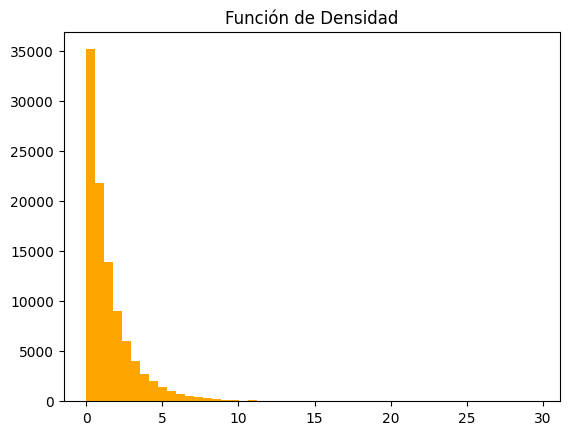

In [21]:
plt.hist ( G ,  bins= 50 ,  color= "orange" ) #Gráfica de la función de densidad
plt.title ( "Función de Densidad" )

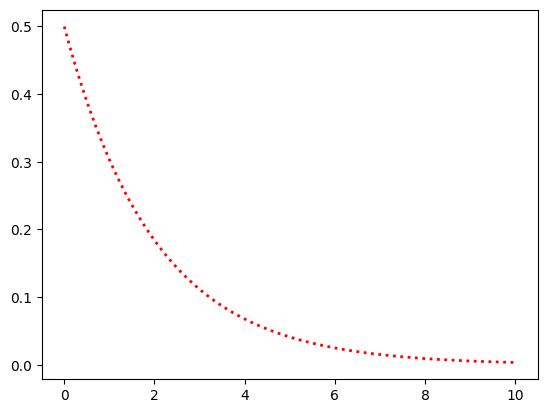

In [48]:
# Parámetros de la distribución exponencial
lambda_param = 0.5  # Tasa lambda
muestra_tam = 1000000  # Tamaño de la muestra

# Comparar con la función de densidad de probabilidad de la exponencial teórica
x = np.linspace(0, 10, 100)
pdf = lambda_param * np.exp(-lambda_param * x)
plt.plot(x, pdf, 'r:', lw=2, label='PDF teórica: $\lambda e^{-\lambda x}$')

In [18]:
def cdf(muestra):
  n=len(muestra)
  x=np.sort(muestra)
  y=np.arange(0,n)/n
  return x,y

In [29]:
X,Y=cdf(G)

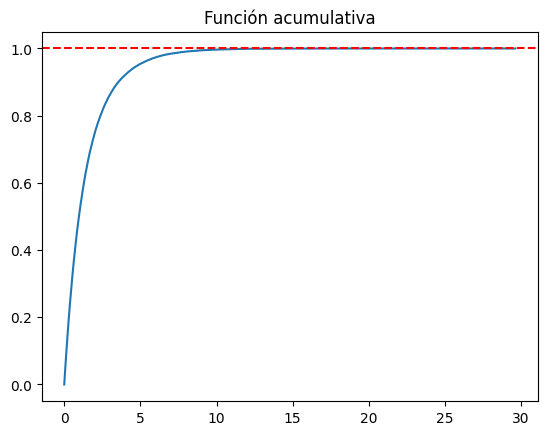

In [45]:
plt.step(X,Y) #El Rango de la función es de 0 a 1
#El dominio es de 0 a infinito
#Es creciente y monótona
plt.title("Función acumulativa")
plt.axhline(1.0000001, color="red",linestyle = "dashed")
#La función cumple que si a<b → F(a)<F(b)

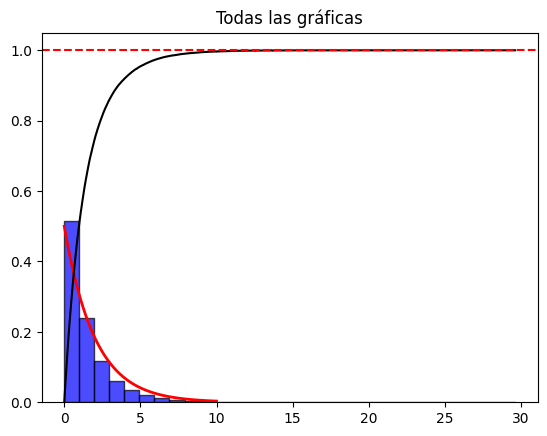

In [49]:
plt.hist ( G ,  bins= 30 , density=True, alpha= 0.7 ,color= "blue" , edgecolor='black') #Gráfica de la función de densidad

plt.plot(x, pdf, 'r-', lw=2, label='PDF teórica: $\lambda e^{-\lambda x}$')
plt.step(X,Y, color="black") #El Rango de la función es de 0 a 1
plt.axhline(1.0000001, color="red",linestyle = "dashed")
plt.title ( "Todas las gráficas" )

plt.show()